# COMP-4740 Final Project
**Created by Saffa Alvi and Nour ElKott**

## Objective
> The purpose of this research data analysis project is to apply deep learning approaches to explore Computer Vision and create a model for the Dogs vs. Cats competition on Kaggle.com. [1] The objective is to use the Kaggle provided dataset and write an algorithm to classify whether the images in the dataset are of a dog or a cat. The goal of this project is to build a performative model to accurately predict the classes of the unlabeled images in the test dataset and to answer the research questions, defined in this report, that are related to computer vision and this competition topic. Our model accuracy will also be compared to other existing models and evaluated to see which properties/characteristics of our model affect its overall accuracy.
> 

[1] https://www.kaggle.com/competitions/dogs-vs-cats

# Imports
The following libraries, functions, etc were imported to help with constructing the CNN model.

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import os
import sklearn
import cv2
import zipfile

## Define the datasets (Dogs vs. Cats from Kaggle)

**dogs-vs-cats/train.zip** The training dataset provided contains 25,000 images of dogs and cats. 

**dogs-vs-cats/test1.zip** Contains the images to test model on.

*This notebook was created on Kaggle to help run the code faster so the dataset filepaths are different from those included in the raw source code and project submission folder*

In [3]:
# Extract zip files in dataset provided from Kaggle
print(os.listdir("../input"))
with zipfile.ZipFile("../input/train.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("../input/test1.zip","r") as z:
    z.extractall(".")

['test1.zip', 'train.zip', 'sampleSubmission.csv']


### Define Dataset paths (from Kaggle)

In [4]:
dataset_path = "/kaggle/working/"
train_dataset = "/kaggle/working/train"
files = os.listdir(train_dataset)

### Iterate through the files in the training data (dogs-vs-cats/train/) and save them into arrays

The train_x array will contain the image data, while the train_y array will contain the image label.

Images from the training dataset are resized to 80x80 and read in greyscale.

In [5]:
# Training Dataset
train_x = []
train_y = []

# Iterate through files in training dataset
for f in files:
  # Get label/animal from filename - ex. cat.0.jpg, label is before .
  label = f.split(".")[0]
  filepath = train_dataset + "/" + f                  # image filepath
  data = imageio.imread(filepath, as_gray = True)     # read the specified image (in greyscale)
  data_arr = cv2.resize(data, dsize = (80, 80))       # resize the image to 80x80
  # add image data and label to respective arrays
  train_x.append(data_arr)
  train_y.append(label)

In [6]:
# Training Data
print(len(train_x))
print(len(train_y))

25000
25000


## Normalize/Scale Data and Change Dimensions

Normalize the values in the training data so they are between 0 and 1. 

Reshape the data as keras needs 4D datasets, and data was 3D.

In [7]:
X_train = tf.keras.utils.normalize(train_x, axis=1) 
X_train = np.expand_dims(X_train, axis=-1)
print(X_train.shape)

(25000, 80, 80, 1)


## Label Encoding (Emotions -> Numbers)

Need to change the string values of animals (cat or dog) into numbers so the CNN can properly predict them based on classes/labels.

In [8]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
Y_train = lb.fit_transform(train_y)
Y_train

Using TensorFlow backend.


array([0, 1, 1, ..., 1, 1, 1])

## Building the Model

2D Convolutional Neural Network (CNN) consisting of Conv2D, pooling, dropout regularization, flatten, and dense layers.

Relu and Sigmoid are used as the activation functions. Sigmois is used since we want a prediction between 0 and 1 (0 = cat, 1 = dog)

Adam is used as the optimizer and the loss function is binary crossentropy.

In [9]:
import tensorflow.keras as keras

# build the model
model = keras.Sequential()

# add the layers

# hidden layers
model.add(keras.layers.Conv2D(128, 3, input_shape=(80, 80, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
tf.keras.layers.Dropout(0.30)

model.add(keras.layers.Conv2D(256, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
tf.keras.layers.Dropout(0.40)

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total para

Depending on machine processing power, fitting the model can take a while (when tested on Kaggle only took about 5 minutes, when tested on local machines, could take up to an hour at 5 mins per epoch)

In [10]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 774us/step - loss: 0.6529 - acc: 0.6161 - val_loss: 0.6466 - val_acc: 0.6270
Epoch 2/10
20000/20000 [==============================] - 11s 557us/step - loss: 0.5908 - acc: 0.6935 - val_loss: 0.5822 - val_acc: 0.7006
Epoch 3/10
20000/20000 [==============================] - 11s 555us/step - loss: 0.5433 - acc: 0.7282 - val_loss: 0.5535 - val_acc: 0.7170
Epoch 4/10
20000/20000 [==============================] - 11s 566us/step - loss: 0.5023 - acc: 0.7551 - val_loss: 0.5426 - val_acc: 0.7328
Epoch 5/10
20000/20000 [==============================] - 11s 562us/step - loss: 0.4545 - acc: 0.7867 - val_loss: 0.5286 - val_acc: 0.7388
Epoch 6/10
20000/20000 [==============================] - 11s 555us/step - loss: 0.3990 - acc: 0.8163 - val_loss: 0.5582 - val_acc: 0.7462
Epoch 7/10
20000/20000 [==============================] - 11s 560us/step - loss: 0.3220 - acc: 0.8605 - val_loss: 0.5

### Save the model so it can be loaded and used for predictions later on 

In [11]:
# Save the model
model.save('model.h5')
json_model = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(json_model)

print("Saved model!")

Saved model!


## Display Model Statistics (Accuracy and Loss)

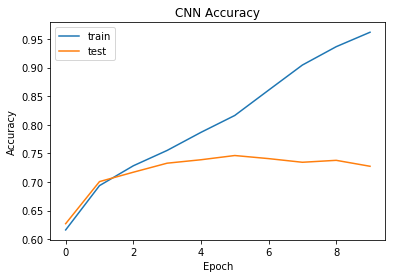

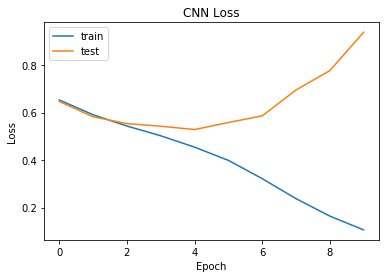

In [12]:
# Display model stats

# Model Accuracy
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predict on Test Dataset using the Model

### Test Dataset Preparation

Similar to how we processed the training data, iterate through the files in dogs-vs-cats/test1, read the images, resize to 80x80, and add to a test array.

In [13]:
test_data = []
test_data_image = []
test_dataset = "/kaggle/working/test1"
files = os.listdir(test_dataset)

for f in files:
  id = f.split(".")[0]
  filepath = test_dataset + "/" + f
  data = imageio.imread(filepath, as_gray = True)     # read the specified image (in greyscale)
  data_arr = cv2.resize(data, dsize = (80, 80))       # resize the image to 80x80
  test_data_image.append(data_arr)


## Normalize/Scale Data and Change Dimensions

Normalize the values in the testing data so they are between 0 and 1. 

Reshape the data as keras needs 4D datasets, and data was 3D.

In [14]:
test_data = tf.keras.utils.normalize(test_data_image, axis=1) 

# need to reshape the data as keras needs 4D datasets, and ours are 3D right now
test_data = np.expand_dims(test_data, axis=-1)
# new reshaped dataset
print(test_data.shape)

# Get the label encoding so user can be given prediction as "cat or dog" instead of "0 or 1"
labels = list(lb.classes_)
labels

(12500, 80, 80, 1)


['cat', 'dog']

## Predict the test dataset from the model

In [15]:
predictions = model.predict(test_data)
print(predictions[:3])

# to get as classes (since we used sigmoid, will have to round)
classes = []
for p in predictions:
  classes.append(round(p[0]))

classes[:3]

[[0.7671168 ]
 [0.30711588]
 [0.9997571 ]]


[1.0, 0.0, 1.0]

## Show the Dog or Cat Image and Model Prediction (Sample)

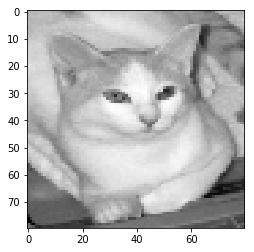

Model prediction - class: 0 which is a cat


In [16]:
import random
import matplotlib.pyplot as plt

size = len(test_data_image)

image = random.randint(0, size)
plt.imshow(test_data_image[image], cmap="gray")
plt.show()

model_prediction = int(classes[image])

print("Model prediction - class:", model_prediction, "which is a", labels[model_prediction])